# Logistic Regression

## 1) 기본 Package 설정

In [1]:
# 기본
import numpy as np
import matplotlib.pyplot as plt # Graph

# 데이터 가져오기
import pandas as pd
from sklearn import datasets

# 데이터 전처리
from sklearn.preprocessing import StandardScaler    # 연속 변수 표준화
from sklearn import preprocessing                   # 범주형 변수 수치화
from sklearn.preprocessing import LabelEncoder      # 범주형 변수 수치화

# 훈련/검증용 데이터 분리
from sklearn.model_selection import train_test_split    # 훈련과 테스트를 위한 데이터 분리

# 분류 모델
# from sklearn.tree import DecisionTreeClassifier       # 의사결정나무
# from sklearn.naive_bayes import GaussianNB            # 나이브 베이즈 분류
# from sklearn.neighbors import KNeighborsClassifier    # K-최근접 이웃
# from sklearn.ensemble import RandomForestClassifier   # 랜덤 포레스트
from sklearn.linear_model import LogisticRegression     # 로지스틱 회귀분석
# from sklearn.svm import SVC                           # SVM(서포트벡터머신)
# from sklearn.neural_network import MLPClassifier      # 다층 인공신경망
# from sklearn.ensemble import VotingClassifier         # 과반수 투표(Majority Voting) 
# from sklearn.ensemble import BaggingClassifier        # 배깅(Bagging) 
# from sklearn.ensemble import AdaBoostClassifier       # 부스팅(Boosting) 

# 모델 검정
from sklearn.metrics import confusion_matrix, classification_report # 정오분류표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer  # 정확도, 민감도 등
from sklearn.metrics import roc_curve, roc_auc_score, auc  # ROC 곡선

# 최적화
from sklearn.model_selection import cross_validate, cross_val_score  # 교차 타당도
from sklearn.pipeline import make_pipeline  # 파이프라인 구축
from sklearn.model_selection import learning_curve, validation_curve # 학습곡선, 검증곡선
from sklearn.model_selection import GridSearchCV    # 하이퍼파라미터 튜닝

## 2) 데이터 가져오기

### 2-1) 데이터 프레임으로 저장
* csv 데이터를 dataframe으로 가져오기

In [2]:
train = pd.read_csv('../Data/train.csv')

# train data의 상위 5개 출력
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


### 2-2) 자료구조 살펴보기

In [3]:
# null값 확인
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB
None


In [4]:
# 배열의 행, 열 갯수 확인
print(train.shape)

(54808, 13)


In [5]:
# column 값 확인
train.keys()

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score',
       'is_promoted'],
      dtype='object')

## 3) 데이터 전처리

### 3-1) Data와 Target으로 분리
- 필요한 data만 추출
- data : `X`, taget : `y`로 분리

In [6]:
# data
X = train.drop(['employee_id','is_promoted'], axis=1)
X.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73


In [7]:
# target
y=train['is_promoted']
np.bincount(y)

array([50140,  4668])

In [8]:
# min accuracy 설정
baseline_accuracy=50140/(50140+4668)
baseline_accuracy

0.9148299518318493

### 3-2) ONE HOT ENCODING
- 범주형 변수는 먼저 숫자로 변경해주어야 한다.
- one-hot-encoding을 통해 string을 integer로 변환할 수 있다

In [9]:
X = pd.get_dummies(X)

In [10]:
# train_df data의 상위 5개 출력
X.head()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.0,8,0,49,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
1,1,30,5.0,4,0,60,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
2,1,34,3.0,7,0,50,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
3,2,39,1.0,10,0,50,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
4,1,45,3.0,2,0,73,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0


### 3-3) null값 변경

In [11]:
# null값을 평균 값으로 대체
X['previous_year_rating'].fillna(X['previous_year_rating'].mean(),inplace=True)

In [12]:
# null값 반영 여부 확인
print(f'데이터 셋의 Null 값 개수:{X.isnull().sum().sum()}')

데이터 셋의 Null 값 개수:0


## 4) 훈련 / 검증용 데이터 분할

### 4-1) 데이터 분리

In [13]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                     test_size = 0.3,   # test set의 비율
                     random_state = 1,  # 무작위 시드 번호
                     stratify = y)      # 결과 레이블의 비율대로 분리

### 4-2) 정규화 
- LR에서는 정규화를 반드시 해주어야 한다.


In [14]:
stdsc = StandardScaler()

X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

## 5) 모델 구축

In [15]:
logistic = LogisticRegression(solver='liblinear',
                              penalty='l2',
                              C=0.001,
                              random_state=1)

logistic.fit(X_train, y_train)

LogisticRegression(C=0.001, random_state=1, solver='liblinear')

## 6) 모델 검정

훈련용 데이터의 정확도와 검증용 데이터의 정확도를 비교하며 검증하는 것이 일반적이다.   
이외에 검증용 데이터로 예측하는 방법도 존재한다.   
`predict()` : class의 결과값으로 표시  
`predict_proba()` : 확률 값으로 표시  

### 6-1) 검증용 데이터로 예측

In [16]:
y_pred = logistic.predict(X_test)

### 6-2) 정오분류표

In [17]:
confmat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                       index=['True[0]','True[1]'],
                       columns=['Predict[0]', 'Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],15027,16
True[1],1270,130


In [18]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     15043
           1       0.89      0.09      0.17      1400

    accuracy                           0.92     16443
   macro avg       0.91      0.55      0.56     16443
weighted avg       0.92      0.92      0.89     16443



### 6-3) 정확도, 민감도 확인

In [19]:
# 정확도, 정밀도, 재현율, f1 score
print(f'잘못 분류된 샘플 개수: {(y_test != y_pred).sum()}')
print(f'정확도: {accuracy_score(y_test, y_pred):.3f}')
print(f'정밀도: {precision_score(y_true=y_test, y_pred=y_pred):.3f}')
print(f'재현율: {recall_score(y_true=y_test, y_pred=y_pred):.3f}')
print(f'F1: {f1_score(y_true=y_test, y_pred=y_pred):.3f}')

잘못 분류된 샘플 개수: 1286
정확도: 0.922
정밀도: 0.890
재현율: 0.093
F1: 0.168


### 6-4) ROC 곡선

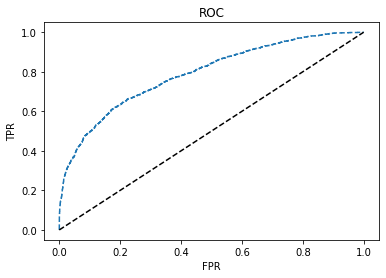

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, logistic.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, '--', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fpr], [tpr], 'r-', ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

## 7) 최적화

In [21]:
pipe_logistic = make_pipeline(LogisticRegression(random_state=1))

In [22]:
pipe_logistic.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'logisticregression', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start'])

In [23]:
param_range = [0.01, 0.1, 1.0, 10, 100, 200]  # 수정

param_grid = [{'logisticregression__C': param_range}] # 수정

gs = GridSearchCV(estimator=pipe_logistic, # 수정
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)

gs = gs.fit(X_train, y_train)

print(f'Best Param : {gs.best_score_}')
print(f'AUC : {gs.best_params_}')

0.9381986641240564
{'logisticregression__C': 100}


In [24]:
best_logistic = gs.best_estimator_
best_logistic.fit(X_train, y_train)

Pipeline(steps=[('logisticregression',
                 LogisticRegression(C=100, random_state=1))])

In [25]:
y_pred = best_logistic.predict(X_test)

In [26]:
confmat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                       index=['True[0]','True[1]'],
                       columns=['Predict[0]', 'Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],15025,18
True[1],989,411


In [27]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     15043
           1       0.96      0.29      0.45      1400

    accuracy                           0.94     16443
   macro avg       0.95      0.65      0.71     16443
weighted avg       0.94      0.94      0.92     16443



In [28]:
# 정확도, 정밀도, 재현율, f1 score
print(f'잘못 분류된 샘플 개수: {(y_test != y_pred).sum()}')
print(f'정확도: {accuracy_score(y_test, y_pred):.3f}')
print(f'정밀도: {precision_score(y_true=y_test, y_pred=y_pred):.3f}')
print(f'재현율: {recall_score(y_true=y_test, y_pred=y_pred):.3f}')
print(f'F1: {f1_score(y_true=y_test, y_pred=y_pred):.3f}')

잘못 분류된 샘플 개수: 1007
정확도: 0.939
정밀도: 0.958
재현율: 0.294
F1: 0.449


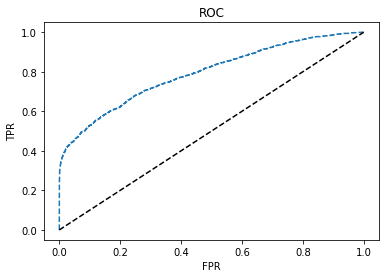

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, best_logistic.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, '--', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fpr], [tpr], 'r-', ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

## REF) Logistic Regress 회귀 계수

전체변수 투입: `sm.Logit(y, X)`  
  
특정변수만 넣고 싶을 때
```py
Logistic_ml = sm.Logit.from_formula("PersonalLoan ~ Age + Experience + Income + Family + CCAvg", bank_df) 

In [ ]:
import statsmodels.api as sm
logistic_ml = sm.Logit(y, X) #로지스틱 회귀분석 시행
logistic_coef = logistic_ml.fit()
logistic_coef.summary2()

In [ ]:
np.exp(logistic_coef.params)